In [1]:
import pandas as pd
import re
import os

In [2]:
def read(folder_path):
  log_arrays = {}
  for filename in os.listdir(folder_path):
    if filename.endswith('.log'):
      with open(os.path.join(folder_path, filename), 'r') as f:
        log_array = f.readlines()
        log_name = filename[:-7]
        log_arrays[log_name] = log_array
        print(log_name)
  return log_arrays

In [3]:
folder_path = "../raw_data"
log_arrays = read(folder_path)

Android
Apache
BGL
Hadoop
HDFS
HealthApp
HPC
Linux
Mac
OpenSSH
OpenStack
Proxifier
Spark
Thunderbird
Windows
Zookeeper


In [4]:
def clean_and_normalize_logs(logs):

    cleaned_logs = {}

    for source, log_array in logs.items():
        cleaned_log_array = []
        for log in log_array:
            cleaned_log = re.sub(r'[^\w\s]', '', log)
            cleaned_log = re.sub(r'\s+', ' ', cleaned_log).strip()
            cleaned_log_array.append(cleaned_log)

        cleaned_logs[source] = cleaned_log_array

    return cleaned_logs

logs = log_arrays
cleaned_logs = clean_and_normalize_logs(logs)

In [5]:
cleaned_logs['Apache']

['Sun Dec 04 044744 2005 notice workerEnvinit ok etchttpdconfworkers2properties',
 'Sun Dec 04 044744 2005 error mod_jk child workerEnv in error state 6',
 'Sun Dec 04 045108 2005 notice jk2_init Found child 6725 in scoreboard slot 10',
 'Sun Dec 04 045109 2005 notice jk2_init Found child 6726 in scoreboard slot 8',
 'Sun Dec 04 045109 2005 notice jk2_init Found child 6728 in scoreboard slot 6',
 'Sun Dec 04 045114 2005 notice workerEnvinit ok etchttpdconfworkers2properties',
 'Sun Dec 04 045114 2005 notice workerEnvinit ok etchttpdconfworkers2properties',
 'Sun Dec 04 045114 2005 notice workerEnvinit ok etchttpdconfworkers2properties',
 'Sun Dec 04 045118 2005 error mod_jk child workerEnv in error state 6',
 'Sun Dec 04 045118 2005 error mod_jk child workerEnv in error state 6',
 'Sun Dec 04 045118 2005 error mod_jk child workerEnv in error state 6',
 'Sun Dec 04 045137 2005 notice jk2_init Found child 6736 in scoreboard slot 10',
 'Sun Dec 04 045138 2005 notice jk2_init Found child 6

In [6]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [7]:
apache_logs = cleaned_logs['Apache']

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [8]:
def preprocess_log(log):
    log = re.sub(r'\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}', '', log)  # IP addresses
    log = re.sub(r'\[\d{2}/[A-Za-z]+/\d{4}:\d{2}:\d{2}:\d{2}\]', '', log)  # dates
    log = re.sub(r'\"[A-Z]+\s[A-Za-z0-9/.?=&-]*\sHTTP/\d\.\d\"', '', log)  # HTTP requests
    log = re.sub(r'\s\d{3}\s\d+', '', log)  # HTTP status codes and data size
    
    log = log.lower()
    
    # Tokenization and lemmatization
    words = nltk.word_tokenize(log)
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words and word.isalnum()]
    print(words)
    
    return ' '.join(words)

In [9]:
preprocessed_logs = [preprocess_log(log) for log in apache_logs]

['sun', 'dec', '04', '044744', '2005', 'notice', 'workerenvinit', 'ok', 'etchttpdconfworkers2properties']
['sun', 'dec', '04', '044744', '2005', 'error', 'child', 'workerenv', 'error', 'state', '6']
['sun', 'dec', '04', '045108', '2005', 'notice', 'found', 'child', '6725', 'scoreboard', 'slot', '10']
['sun', 'dec', '04', '045109', '2005', 'notice', 'found', 'child', '6726', 'scoreboard', 'slot', '8']
['sun', 'dec', '04', '045109', '2005', 'notice', 'found', 'child', '6728', 'scoreboard', 'slot', '6']
['sun', 'dec', '04', '045114', '2005', 'notice', 'workerenvinit', 'ok', 'etchttpdconfworkers2properties']
['sun', 'dec', '04', '045114', '2005', 'notice', 'workerenvinit', 'ok', 'etchttpdconfworkers2properties']
['sun', 'dec', '04', '045114', '2005', 'notice', 'workerenvinit', 'ok', 'etchttpdconfworkers2properties']
['sun', 'dec', '04', '045118', '2005', 'error', 'child', 'workerenv', 'error', 'state', '6']
['sun', 'dec', '04', '045118', '2005', 'error', 'child', 'workerenv', 'error', 'sta

In [10]:
print(preprocessed_logs)

['sun dec 04 044744 2005 notice workerenvinit ok etchttpdconfworkers2properties', 'sun dec 04 044744 2005 error child workerenv error state 6', 'sun dec 04 045108 2005 notice found child 6725 scoreboard slot 10', 'sun dec 04 045109 2005 notice found child 6726 scoreboard slot 8', 'sun dec 04 045109 2005 notice found child 6728 scoreboard slot 6', 'sun dec 04 045114 2005 notice workerenvinit ok etchttpdconfworkers2properties', 'sun dec 04 045114 2005 notice workerenvinit ok etchttpdconfworkers2properties', 'sun dec 04 045114 2005 notice workerenvinit ok etchttpdconfworkers2properties', 'sun dec 04 045118 2005 error child workerenv error state 6', 'sun dec 04 045118 2005 error child workerenv error state 6', 'sun dec 04 045118 2005 error child workerenv error state 6', 'sun dec 04 045137 2005 notice found child 6736 scoreboard slot 10', 'sun dec 04 045138 2005 notice found child 6733 scoreboard slot 7', 'sun dec 04 045138 2005 notice found child 6734 scoreboard slot 9', 'sun dec 04 04515

In [11]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

log_embeddings = model.encode(preprocessed_logs)

print(log_embeddings)

e:\AI ML DL\LogParser\.venv\Lib\site-packages\sentence_transformers\cross_encoder\CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
e:\AI ML DL\LogParser\.venv\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


[[-0.4228152  -0.14745165  0.00842975 ... -0.30770114  0.09045263
   0.39517534]
 [-0.28452283  0.07012287 -0.1869703  ... -0.05619347  0.23543167
   0.15820754]
 [-0.10224357  0.280464   -0.23054881 ...  0.14265904 -0.20962477
   0.23463793]
 ...
 [-0.07467957  0.2729137  -0.30917662 ...  0.19559029 -0.16422082
   0.19411545]
 [-0.398622    0.05272147  0.00859179 ... -0.40844062  0.18302052
   0.45896313]
 [-0.3010889   0.12705521 -0.08982296 ... -0.01353947  0.36152664
   0.22993274]]


In [12]:
from sentence_transformers import util
    
similarities = util.pytorch_cos_sim(log_embeddings, log_embeddings)

import pandas as pd

similarity_df = pd.DataFrame(similarities, index=apache_logs, columns=apache_logs)
print(similarity_df)

                                                    Sun Dec 04 044744 2005 notice workerEnvinit ok etchttpdconfworkers2properties  \
Sun Dec 04 044744 2005 notice workerEnvinit ok ...                                           1.000000                               
Sun Dec 04 044744 2005 error mod_jk child worke...                                           0.640211                               
Sun Dec 04 045108 2005 notice jk2_init Found ch...                                           0.284006                               
Sun Dec 04 045109 2005 notice jk2_init Found ch...                                           0.314093                               
Sun Dec 04 045109 2005 notice jk2_init Found ch...                                           0.308912                               
...                                                                                               ...                               
Mon Dec 05 191411 2005 error mod_jk child worke...                   

In [13]:
new_log = "127.0.0.1 - - [28/Aug/2024:12:36:10] \"GET /home.html HTTP/1.1\" 200 2048"

preprocessed_new_log = preprocess_log(new_log)

new_log_embedding = model.encode(preprocessed_new_log)

similarities_with_new_log = util.pytorch_cos_sim(new_log_embedding, log_embeddings)

most_similar_index = similarities_with_new_log.argmax()
most_similar_log = apache_logs[most_similar_index]
similarity_score = similarities_with_new_log[0][most_similar_index].item()

print(f"Most similar log: {most_similar_log}")
print(f"Similarity score: {similarity_score}")


[]
Most similar log: Mon Dec 05 033651 2005 notice jk2_init Found child 2811 in scoreboard slot 9
Similarity score: 0.1407538652420044


In [14]:
severity_mapping = {
    "error": 5,
    "warning": 3,
    "info": 1,
}

def determine_severity(log):
    if "error" in log:
        return severity_mapping["error"]
    elif "warning" in log:
        return severity_mapping["warning"]
    else:
        return severity_mapping["info"]

assigned_severity = determine_severity(most_similar_log)
print(f"Assigned Severity: {assigned_severity}")


Assigned Severity: 1


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


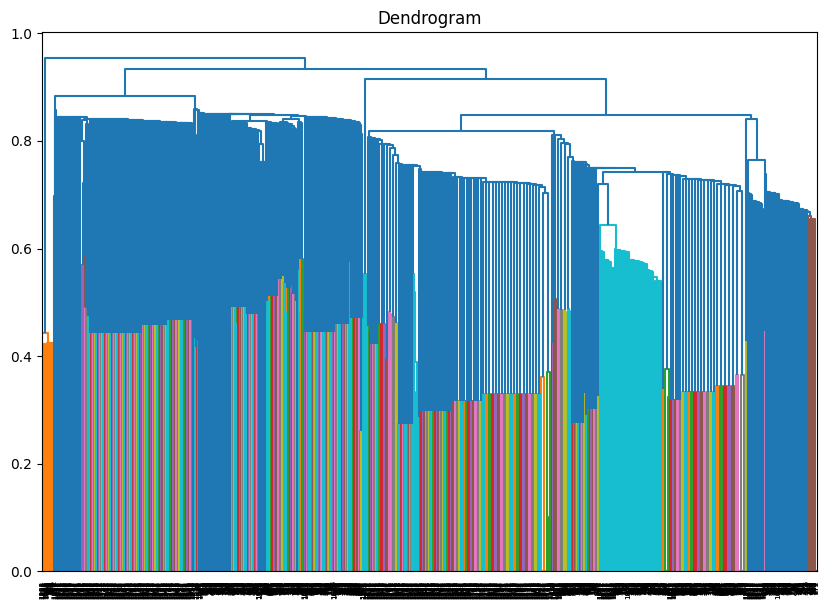

Cluster Labels: [0 0 2 ... 2 0 0]


In [15]:
# Clustering Approach

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

apache_logs = cleaned_logs['Apache']

def preprocess_log(log):
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    
    log = log.lower()
    words = word_tokenize(log)
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words and word.isalnum()]
    
    return ' '.join(words)

preprocessed_logs = [preprocess_log(log) for log in apache_logs]

# Vectorization using TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(preprocessed_logs)

similarity_matrix = cosine_similarity(X)
clustering_model = AgglomerativeClustering(n_clusters=3, linkage='average', metric='cosine')
labels = clustering_model.fit_predict(X.toarray())

plt.figure(figsize=(10, 7))
plt.title("Dendrogram")
dend = shc.dendrogram(shc.linkage(X.toarray(), method='average', metric='cosine'))
plt.show()

print("Cluster Labels:", labels)


e:\AI ML DL\LogParser\.venv\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
e:\AI ML DL\LogParser\.venv\Lib\site-packages\threadpoolctl.py:1214: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)
e:\AI ML DL\LogParser\.venv\Lib\site-packages\IPython\core\pylabtools.py

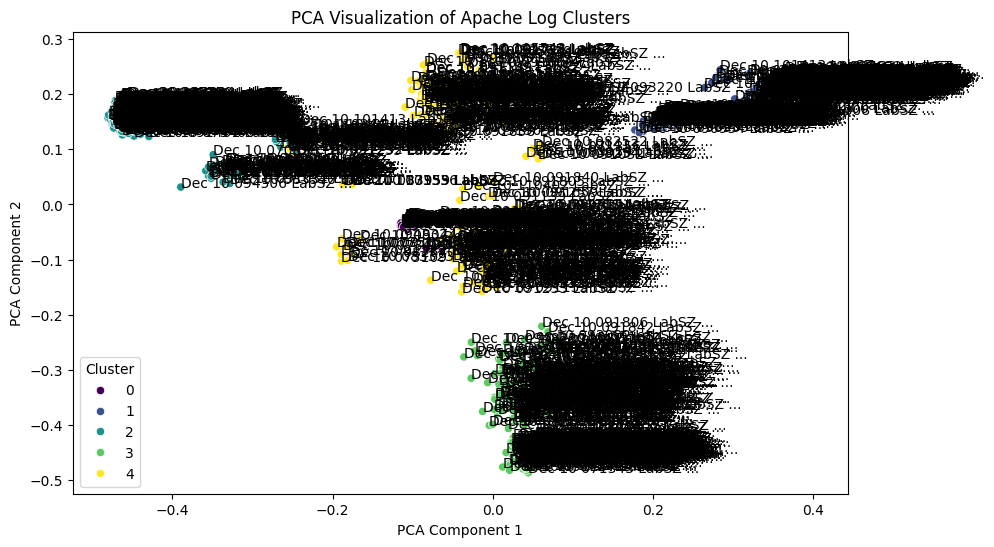


Cluster 0:
  - Dec 10 065546 LabSZ sshd24200 reverse mapping checking getaddrinfo for nsmarryaldkfaczczcom 17323431186 failed POSSIBLE BREAKIN ATTEMPT
  - Dec 10 070828 LabSZ sshd24208 reverse mapping checking getaddrinfo for nsmarryaldkfaczczcom 17323431186 failed POSSIBLE BREAKIN ATTEMPT
  - Dec 10 074800 LabSZ sshd24321 reverse mapping checking getaddrinfo for 191210223172uservivozapcombr 191210223172 failed POSSIBLE BREAKIN ATTEMPT
  - Dec 10 075112 LabSZ sshd24324 reverse mapping checking getaddrinfo for 19515437122revponeytelecomeu 19515437122 failed POSSIBLE BREAKIN ATTEMPT
  - Dec 10 075117 LabSZ sshd24326 reverse mapping checking getaddrinfo for 19515437122revponeytelecomeu 19515437122 failed POSSIBLE BREAKIN ATTEMPT
  - Dec 10 091246 LabSZ sshd24503 reverse mapping checking getaddrinfo for customer187141143180stauninetidecommx 187141143180 failed POSSIBLE BREAKIN ATTEMPT
  - Dec 10 091251 LabSZ sshd24505 reverse mapping checking getaddrinfo for customer187141143180staunineti

In [16]:
# Sentence BERT Approach

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sentence_transformers import SentenceTransformer

apache_logs = cleaned_logs['OpenSSH']

# Sentence-BERT model and generated embeddings
model = SentenceTransformer('all-MiniLM-L6-v2')  
embeddings = model.encode(apache_logs)

n_clusters = 5  
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
labels = kmeans.fit_predict(embeddings)

pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=reduced_embeddings[:, 0], y=reduced_embeddings[:, 1], hue=labels, palette='viridis')
for i, txt in enumerate(apache_logs):
    plt.annotate(txt[:20] + "...", (reduced_embeddings[i, 0], reduced_embeddings[i, 1]))

plt.title('PCA Visualization of Apache Log Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

clustered_logs = {i: [] for i in range(n_clusters)}
for log, label in zip(apache_logs, labels):
    clustered_logs[label].append(log)

for cluster, logs in clustered_logs.items():
    print(f"\nCluster {cluster}:")
    for log in logs:
        print(f"  - {log}")


e:\AI ML DL\LogParser\.venv\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
C:\Users\HP\AppData\Local\Temp\ipykernel_15256\2786503363.py:21: UserWarning: 
The markers list has fewer values (3) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(


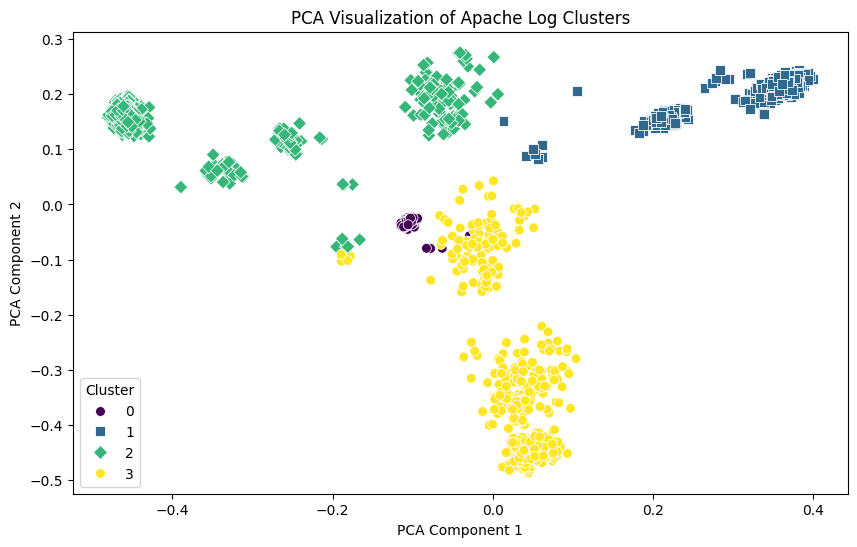


Cluster 0:
  - Dec 10 065546 LabSZ sshd24200 reverse mapping checking getaddrinfo for nsmarryaldkfaczczcom 17323431186 failed POSSIBLE BREAKIN ATTEMPT
  - Dec 10 070828 LabSZ sshd24208 reverse mapping checking getaddrinfo for nsmarryaldkfaczczcom 17323431186 failed POSSIBLE BREAKIN ATTEMPT
  - Dec 10 074800 LabSZ sshd24321 reverse mapping checking getaddrinfo for 191210223172uservivozapcombr 191210223172 failed POSSIBLE BREAKIN ATTEMPT
  - Dec 10 075112 LabSZ sshd24324 reverse mapping checking getaddrinfo for 19515437122revponeytelecomeu 19515437122 failed POSSIBLE BREAKIN ATTEMPT
  - Dec 10 075117 LabSZ sshd24326 reverse mapping checking getaddrinfo for 19515437122revponeytelecomeu 19515437122 failed POSSIBLE BREAKIN ATTEMPT
  - Dec 10 091246 LabSZ sshd24503 reverse mapping checking getaddrinfo for customer187141143180stauninetidecommx 187141143180 failed POSSIBLE BREAKIN ATTEMPT
  - Dec 10 091251 LabSZ sshd24505 reverse mapping checking getaddrinfo for customer187141143180staunineti

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sentence_transformers import SentenceTransformer

apache_logs = cleaned_logs['OpenSSH']

model = SentenceTransformer('all-MiniLM-L6-v2')  
embeddings = model.encode(apache_logs)

n_clusters = 4  
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
labels = kmeans.fit_predict(embeddings)

pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=reduced_embeddings[:, 0], 
    y=reduced_embeddings[:, 1], 
    hue=labels, 
    palette='viridis', 
    style=labels,  
    markers=["o", "s", "D"],  
    s=50  
)

plt.title('PCA Visualization of Apache Log Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

# Step 5: Display Clustering Results
clustered_logs = {i: [] for i in range(n_clusters)}
for log, label in zip(apache_logs, labels):
    clustered_logs[label].append(log)

for cluster, logs in clustered_logs.items():
    print(f"\nCluster {cluster}:")
    for log in logs:
        print(f"  - {log}")


e:\AI ML DL\LogParser\.venv\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
C:\Users\HP\AppData\Local\Temp\ipykernel_15256\601701747.py:37: UserWarning: 
The markers list has fewer values (3) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(


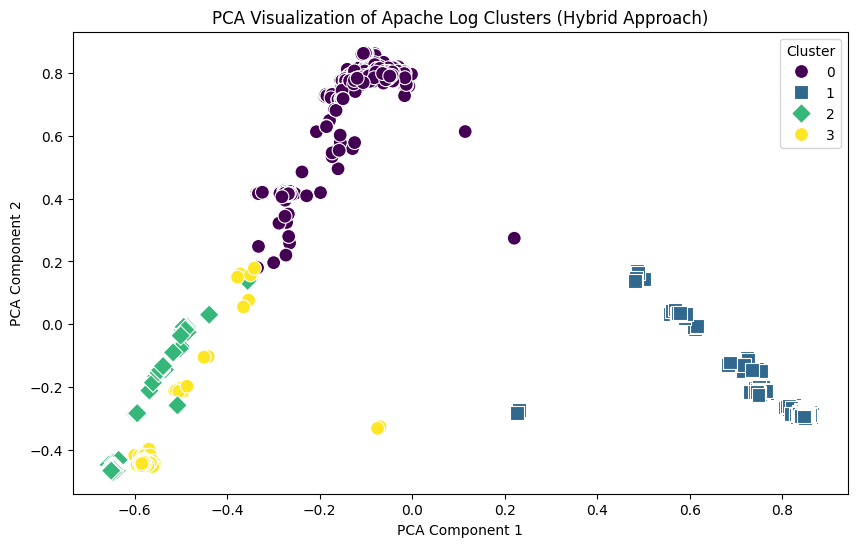


Cluster 0:
  - Dec 10 065546 LabSZ sshd24200 reverse mapping checking getaddrinfo for nsmarryaldkfaczczcom 17323431186 failed POSSIBLE BREAKIN ATTEMPT
  - Dec 10 065546 LabSZ sshd24200 Invalid user webmaster from 17323431186
  - Dec 10 065546 LabSZ sshd24200 input_userauth_request invalid user webmaster preauth
  - Dec 10 065548 LabSZ sshd24200 Failed password for invalid user webmaster from 17323431186 port 38926 ssh2
  - Dec 10 065548 LabSZ sshd24200 Connection closed by 17323431186 preauth
  - Dec 10 070247 LabSZ sshd24203 Connection closed by 21247254145 preauth
  - Dec 10 070738 LabSZ sshd24206 Invalid user test9 from 528034196
  - Dec 10 070738 LabSZ sshd24206 input_userauth_request invalid user test9 preauth
  - Dec 10 070745 LabSZ sshd24206 Failed password for invalid user test9 from 528034196 port 36060 ssh2
  - Dec 10 070828 LabSZ sshd24208 reverse mapping checking getaddrinfo for nsmarryaldkfaczczcom 17323431186 failed POSSIBLE BREAKIN ATTEMPT
  - Dec 10 070828 LabSZ sshd24

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sentence_transformers import SentenceTransformer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

apache_logs = cleaned_logs['OpenSSH']

model = SentenceTransformer('all-MiniLM-L6-v2')  
embeddings = model.encode(apache_logs)

# Topic Modeling with LDA
vectorizer = CountVectorizer(max_features=5000, stop_words='english')
X_counts = vectorizer.fit_transform(apache_logs)

lda = LatentDirichletAllocation(n_components=3, random_state=42)
lda_topics = lda.fit_transform(X_counts)

# Combined embeddings and LDA topic distributions
combined_features = np.hstack((embeddings, lda_topics))

n_clusters = 4  
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
labels = kmeans.fit_predict(combined_features)

pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(combined_features)

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=reduced_embeddings[:, 0], 
    y=reduced_embeddings[:, 1], 
    hue=labels, 
    palette='viridis', 
    style=labels,  
    markers=["o", "s", "D"],  
    s=100  
)

plt.title('PCA Visualization of Apache Log Clusters (Hybrid Approach)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

clustered_logs = {i: [] for i in range(n_clusters)}
for log, label in zip(apache_logs, labels):
    clustered_logs[label].append(log)

for cluster, logs in clustered_logs.items():
    print(f"\nCluster {cluster}:")
    for log in logs:
        print(f"  - {log}")
